In [118]:
#import Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
import matplotlib.pyplot as plt


In [4]:
cd D:\saravanan\Lockdown ML projects\project-4\KNN\data set

D:\saravanan\Lockdown ML projects\project-4\KNN\data set


In [6]:
#reading the File
data=pd.read_csv('nba_2013.csv')

In [7]:
#knowing the shape of the data
data.shape

(481, 31)

In [9]:
#filtering out required columns in the data
df=data[['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'pf','pts']]

In [10]:
#check out the uniqueness of the values in the column.
#df['pos'].unique()

df['bref_team_id'].unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [14]:
#Using LabelEncoder changing the catagorical values into numerical
df['pos']=LabelEncoder().fit(df['pos']).transform(df['pos'])
df['bref_team_id']=LabelEncoder().fit(df['bref_team_id']).transform(df['bref_team_id'])
df[['player']]=LabelEncoder().fit(df['player']).transform(df['player'])


d:\Profiles\sdhanapal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
d:\Profiles\sdhanapal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
#rename the column names into standaredize names 
df.rename(columns={'bref_team_id':'teamid','g':'matchesplayed','gs':'gamesstarted','pts':'points','player':'player_id'},inplace=True)

d:\Profiles\sdhanapal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [58]:
#Splitting the data
#here not used earlier method since X,Y values are not required
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('points', axis=1)
y_train = train['points']

x_test = test.drop('points', axis = 1)
y_test = test['points']

In [111]:
#choosing optimized K-value using for loop
val_list=[]
for i in range(1,20):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    err=sqrt(mean_squared_error(y_test,pred))
    val_list.append(err)
   # print(i,val_list)
    print('RMSE value for k= ' , i , 'is:', val_list)

RMSE value for k=  1 is: [396.7802744679939]
RMSE value for k=  2 is: [396.7802744679939, 323.9880744931719]
RMSE value for k=  3 is: [396.7802744679939, 323.9880744931719, 295.16259951636266]
RMSE value for k=  4 is: [396.7802744679939, 323.9880744931719, 295.16259951636266, 279.55499659403273]
RMSE value for k=  5 is: [396.7802744679939, 323.9880744931719, 295.16259951636266, 279.55499659403273, 268.1443646170138]
RMSE value for k=  6 is: [396.7802744679939, 323.9880744931719, 295.16259951636266, 279.55499659403273, 268.1443646170138, 263.8700829757992]
RMSE value for k=  7 is: [396.7802744679939, 323.9880744931719, 295.16259951636266, 279.55499659403273, 268.1443646170138, 263.8700829757992, 255.4102565589806]
RMSE value for k=  8 is: [396.7802744679939, 323.9880744931719, 295.16259951636266, 279.55499659403273, 268.1443646170138, 263.8700829757992, 255.4102565589806, 247.47966021438526]
RMSE value for k=  9 is: [396.7802744679939, 323.9880744931719, 295.16259951636266, 279.55499659

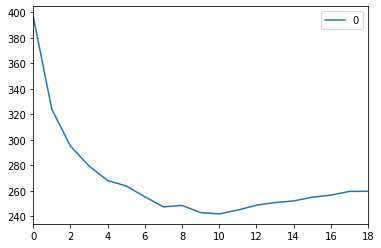

In [112]:
#elbow method to know the K-value
curve=pd.DataFrame(val_list)
curve.plot()

In [113]:
#after K value,implemeting regression.    
knn=KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train,y_train)


  

255.4102565589806


In [115]:
pred=knn.predict(x_test)
pred

array([1180.14285714, 1054.85714286,  103.71428571,  298.42857143,
         62.14285714, 1240.71428571,   53.57142857,  148.28571429,
         46.57142857, 1037.85714286,  179.85714286,   86.        ,
        443.71428571, 1047.85714286,  676.14285714,   31.57142857,
        638.        ,  423.42857143, 1032.71428571,  867.        ,
        275.        ,  614.28571429, 1219.42857143, 1267.42857143,
        102.14285714,    7.        ,  382.42857143,   62.14285714,
        143.14285714,  104.14285714,  909.71428571,   18.42857143,
        701.14285714,  233.42857143,  288.85714286,  346.57142857,
        688.57142857,  112.42857143,   68.85714286, 1242.42857143,
        959.42857143, 1089.85714286,  258.28571429,  782.42857143,
       1092.42857143,   60.71428571,  122.        ,  313.42857143,
        851.85714286,  924.        ,  759.28571429,   92.85714286,
        699.85714286,  298.14285714,  745.        ,   18.42857143,
       1086.14285714,  607.57142857,   62.14285714, 1209.28571

In [ ]:
#finding out mse
err=sqrt(mean_squared_error(y_test,pred))
print(err)

In [117]:
#To_know the model accuracy
r2_score(y_test,pred)

0.7468471272235429